In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor


from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Read the Dataset

In [6]:
df_raw = pd.read_csv("../data/web_trust.csv",index_col=0)
print("shape:",df_raw.shape)
df_raw.head()

shape: (5691, 49)


,document_id,URL,Credibility_rating,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,category,JJ,NN,DT,VB,RB,num_ne,sum_ne,document_url_y,X1,X2,X3,X4,X5,X9,Total,Leik,Eijk,Tastle,Leik 3 4 6,correction,resp_HNC,Controversial,troia_label
0,2199424,http://unemployment.ohio.gov/,3.714286,0.0,0.0,106.0,6.0,9.0,5.0,22.0,23.0,0.0,10.0,12.0,62.0,84.0,68.0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,computer_internet,121.0,938.0,184.0,338.0,52.0,7.0,29.0,gov,0.0,1.0,2.0,2.0,2.0,0.0,7.0,0.571429,0.357143,0.613196,0.542857,0.0,2,U,3.0
1,2199427,http://www.law.cornell.edu/wex/unemployment_co...,4.428571,4.0,75000.0,1824.0,5.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9098.0,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,business,35.0,168.0,59.0,71.0,5.0,4.0,17.0,edu,0.0,0.0,1.0,2.0,4.0,0.0,7.0,0.714286,0.714286,0.735143,0.600000,0.0,3,U,5.0
2,2547110,http://kiem-tv.com/?q=node/4395,4.000000,0.0,0.0,18.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,185.0,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,health,18.0,100.0,23.0,52.0,11.0,5.0,20.0,com,0.0,0.0,2.0,3.0,2.0,0.0,7.0,0.714286,0.571429,0.762836,0.657143,0.0,2,U,4.0
3,2547112,http://www.sciencedaily.com/releases/2012/09/1...,4.833333,9.0,75000.0,383.0,3.0,45.0,9.0,100.0,2.0,0.0,17.0,35.0,113.0,165.0,50939.0,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,health,39.0,156.0,46.0,67.0,21.0,8.0,24.0,com,0.0,0.0,0.0,1.0,5.0,0.0,6.0,0.916667,0.916667,0.892660,0.866667,0.0,3,U,5.0
4,2547113,http://articles.timesofindia.indiatimes.com/20...,3.888889,2.0,75000.0,599.0,3.0,3.0,3.0,7.0,0.0,0.0,1.0,3.0,3.0,7.0,1250.0,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,science_technology,32.0,112.0,39.0,57.0,8.0,6.0,10.0,com,0.0,0.0,3.0,4.0,2.0,0.0,9.0,0.722222,0.611111,0.756750,0.688889,0.0,2,U,4.0


#### Inference: There are 5,691 rows and 49 columns in the raw data set

### Check the Column datatypes

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5691 entries, 0 to 5690
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   document_id          5691 non-null   int64  
 1   URL                  5691 non-null   object 
 2   Credibility_rating   5691 non-null   float64
 3   ad_count             5642 non-null   float64
 4   ad_max_size          5642 non-null   float64
 5   css_definitions      5662 non-null   float64
 6   page_rank            5687 non-null   float64
 7   bitly_clicks         5684 non-null   float64
 8   bitly_referrers      5684 non-null   float64
 9   tweets               5687 non-null   float64
 10  delicious_bookmarks  5662 non-null   float64
 11  fb_clicks            5680 non-null   float64
 12  fb_comments          5680 non-null   float64
 13  fb_likes             5680 non-null   float64
 14  fb_shares            5680 non-null   float64
 15  fb_total             5462 non-null   f

#### Inference: Looking at the information above we can see there are null values in some of the columns , also some of the columns we don't need for URL classification.

### Delete the columns not needed for Analysis

In [8]:
#cols_not_required = ['document_id','URL',"num_ne","sum_ne","fb_total",'X1',"X2","X3","X4","X5","X9",
                    # "Total","Leik","Eijk","Tastle","Leik 3 4 6","correction","troia_label",'Credibility_rating']
cols_not_required = ['document_id','URL','Credibility_rating','X1',"X2","X3","X4","X5","X9","Total"]

In [9]:
# make a copy of the raw data
df_main = df_raw.copy()

In [10]:
df_main.drop(cols_not_required,axis=1,inplace=True)
df_main.head()

,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,category,JJ,NN,DT,VB,RB,num_ne,sum_ne,document_url_y,Leik,Eijk,Tastle,Leik 3 4 6,correction,resp_HNC,Controversial,troia_label
0,0.0,0.0,106.0,6.0,9.0,5.0,22.0,23.0,0.0,10.0,12.0,62.0,84.0,68.0,6137.0,101.0,114.0,1.0,0.0,98.0,6.543833,15.903189,computer_internet,121.0,938.0,184.0,338.0,52.0,7.0,29.0,gov,0.571429,0.357143,0.613196,0.542857,0.0,2,U,3.0
1,4.0,75000.0,1824.0,5.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9098.0,2661.0,15.0,23.0,0.0,0.0,2.0,3.813895,15.903189,business,35.0,168.0,59.0,71.0,5.0,4.0,17.0,edu,0.714286,0.714286,0.735143,0.600000,0.0,3,U,5.0
2,0.0,0.0,18.0,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,185.0,809409.0,19.0,18.0,0.0,1.0,26.0,3.163160,11.208143,health,18.0,100.0,23.0,52.0,11.0,5.0,20.0,com,0.714286,0.571429,0.762836,0.657143,0.0,2,U,4.0
3,9.0,75000.0,383.0,3.0,45.0,9.0,100.0,2.0,0.0,17.0,35.0,113.0,165.0,50939.0,2549.0,19.0,20.0,0.0,0.0,15.0,3.727098,14.554593,health,39.0,156.0,46.0,67.0,21.0,8.0,24.0,com,0.916667,0.916667,0.892660,0.866667,0.0,3,U,5.0
4,2.0,75000.0,599.0,3.0,3.0,3.0,7.0,0.0,0.0,1.0,3.0,3.0,7.0,1250.0,132.0,19.0,17.0,0.0,0.0,16.0,3.357533,14.554593,science_technology,32.0,112.0,39.0,57.0,8.0,6.0,10.0,com,0.722222,0.611111,0.756750,0.688889,0.0,2,U,4.0


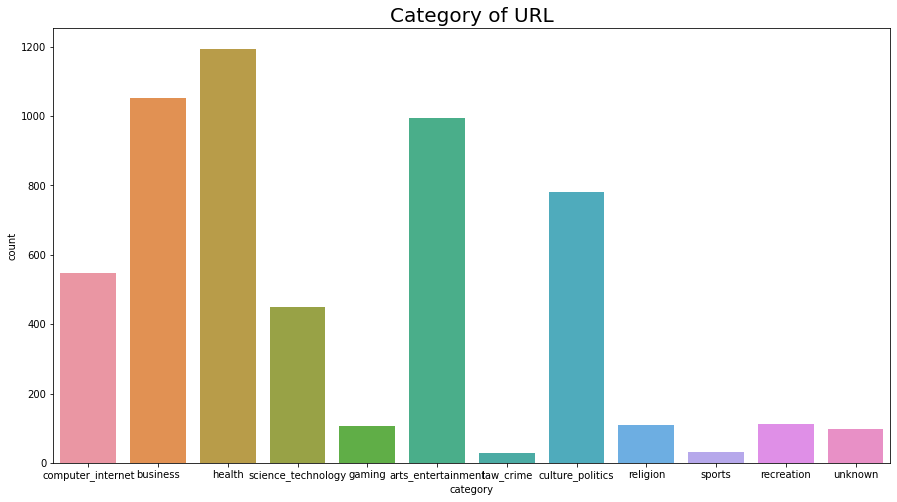

In [11]:
plt.figure(figsize = (15,8))
plt.title('Category of URL',loc='center',fontsize='20')
sns.countplot(x='category',data=df_main)
plt.show()

Inference: Plot shows most URL belong to Health,Business, entertainment genre.

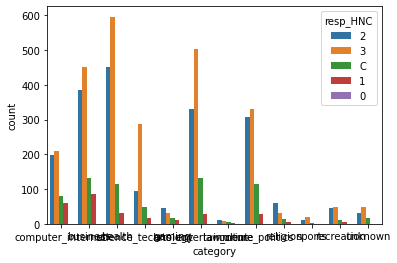

In [12]:
sns.countplot(x="category",hue='resp_HNC',data=df_main)
plt.show()

The value of 'resp_HNC' plays vital role in classification og genre.

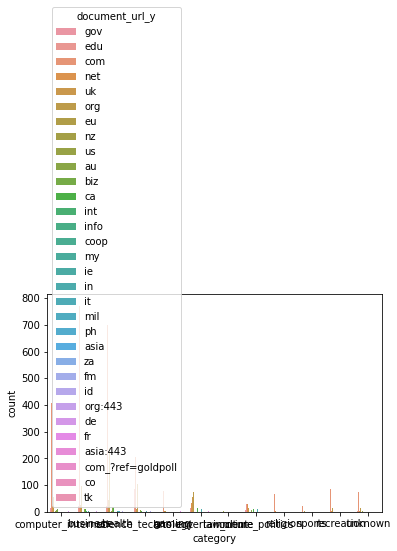

In [13]:
sns.countplot(x="category",hue='document_url_y',data=df_main)
plt.show()

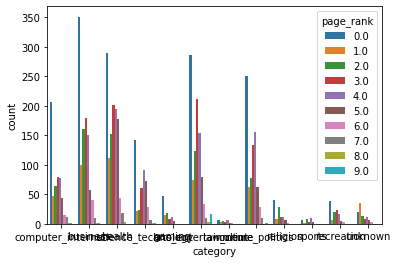

In [14]:
sns.countplot(x="category",hue='page_rank',data=df_main)
plt.show()

This shows each category has more URL with pagerank 0.0,3.0.

In [15]:
#sns.pairplot(df_main, hue="category",height=1.5)

In [16]:
df_main.columns

Index(['ad_count', 'ad_max_size', 'css_definitions', 'page_rank',
       'bitly_clicks', 'bitly_referrers', 'tweets', 'delicious_bookmarks',
       'fb_clicks', 'fb_comments', 'fb_likes', 'fb_shares', 'fb_total',
       'alexa_linksin', 'alexa_rank', 'commas', 'dots', 'exclamations',
       'questions', 'spelling_errors', 'text_complexity', 'smog', 'category',
       'JJ', 'NN', 'DT', 'VB', 'RB', 'num_ne', 'sum_ne', 'document_url_y',
       'Leik', 'Eijk', 'Tastle', 'Leik 3 4 6', 'correction', 'resp_HNC',
       'Controversial', 'troia_label'],
      dtype='object')

In [17]:
df_main.select_dtypes(include=['object']).columns

Index(['category', 'document_url_y', 'resp_HNC', 'Controversial'], dtype='object')

### Handling the missing values

In [18]:
df_main.shape

(5691, 39)

In [19]:
df_main['category'].nunique()

12

In [20]:
df_main.corr().T

,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,JJ,NN,DT,VB,RB,num_ne,sum_ne,Leik,Eijk,Tastle,Leik 3 4 6,correction,troia_label
ad_count,1.000000,0.749020,0.105013,0.002177,-0.006468,0.023821,-0.007034,0.054213,-0.015845,0.011743,0.000107,0.001825,0.004321,-0.022206,-0.120765,0.005466,0.011925,0.015139,0.129593,0.028105,0.148723,-0.048881,0.012432,0.031327,0.012292,0.024271,0.023779,0.074422,0.057046,-0.018840,-0.007130,-0.020657,-0.021642,-0.006820,-0.012063
ad_max_size,0.749020,1.000000,0.244838,0.047202,-0.003862,0.063948,-0.006841,0.060149,-0.011621,0.061072,0.032196,0.019102,0.039266,0.006907,-0.140518,0.005167,0.009886,0.033158,0.147539,0.054352,0.149268,-0.060404,0.005580,0.039628,0.007884,0.017958,0.024726,0.135040,0.073724,0.009551,0.023718,0.008765,-0.008196,0.015891,0.016314
css_definitions,0.105013,0.244838,1.000000,0.208265,-0.002206,0.081826,-0.006038,-0.018434,-0.004465,0.030900,0.019565,0.014923,0.025043,0.135604,-0.186739,0.010165,0.020274,0.044941,0.049279,0.077129,0.087659,0.007645,0.003220,0.059572,-0.003336,0.006605,0.009932,0.223471,0.096813,0.069225,0.073888,0.059415,0.025998,0.036872,0.087601
page_rank,0.002177,0.047202,0.208265,1.000000,0.016510,0.088968,0.014889,0.111164,0.048271,0.073455,0.052489,0.032643,0.062025,0.136177,-0.167540,0.057884,0.049852,-0.054878,0.037747,0.069657,0.102315,0.094322,0.052889,0.057166,0.042866,0.040567,0.023780,0.166469,0.110519,0.121934,0.123140,0.106699,0.061925,0.064699,0.130069
bitly_clicks,-0.006468,-0.003862,-0.002206,0.016510,1.000000,0.376216,0.991622,0.010839,0.190505,0.230419,0.697212,0.155727,0.461257,0.001253,-0.009387,-0.003906,-0.004524,0.004475,-0.005176,-0.003128,-0.016038,0.003987,-0.005110,-0.003782,-0.004415,-0.004793,-0.005676,-0.016388,-0.004729,-0.014491,-0.009382,-0.015331,-0.017748,-0.027822,0.010476
bitly_referrers,0.023821,0.063948,0.081826,0.088968,0.376216,1.000000,0.308982,0.146420,0.112416,0.475833,0.483378,0.258578,0.453748,0.056542,-0.056995,0.028043,0.018945,0.041951,0.022799,0.059269,0.033359,0.014375,0.017055,0.050265,0.010634,0.012162,0.010954,0.049057,0.055373,0.003709,0.011686,-0.004632,-0.010058,0.000552,0.033060
tweets,-0.007034,-0.006841,-0.006038,0.014889,0.991622,0.308982,1.000000,0.025829,0.192240,0.220214,0.697113,0.152945,0.457697,-0.000515,-0.006948,-0.003082,-0.003220,-0.002036,-0.003671,-0.003841,-0.014523,0.005035,-0.004044,-0.003259,-0.003364,-0.003699,-0.004318,-0.015742,-0.004643,-0.014880,-0.010347,-0.015098,-0.017479,-0.029942,0.006615
delicious_bookmarks,0.054213,0.060149,-0.018434,0.111164,0.010839,0.146420,0.025829,1.000000,0.132644,0.213801,0.139618,0.111456,0.163315,0.056973,-0.033778,0.035445,0.039850,0.002799,0.135336,0.030581,0.073842,-0.016253,0.035332,0.057559,0.031310,0.033031,0.026053,0.038381,0.057960,0.010907,0.006612,0.005848,0.004200,0.006704,0.004772
fb_clicks,-0.015845,-0.011621,-0.004465,0.048271,0.190505,0.112416,0.192240,0.132644,1.000000,0.119966,0.233498,0.263330,0.245496,0.058515,-0.009998,0.012040,0.010757,-0.002359,-0.007478,-0.000713,0.003865,-0.008932,0.015371,0.008990,0.012322,0.012139,0.008404,-0.005377,0.025476,-0.004821,0.003358,-0.007277,-0.012650,-0.011202,0.037920
fb_comments,0.011743,0.061072,0.030900,0.073455,0.230419,0.475833,0.220214,0.213801,0.119966,1.000000,0.772989,0.560332,0.839177,0.045575,-0.023768,0.041192,0.047339,0.006387,0.012450,0.024290,0.026210,-0.002915,0.036149,0.038101,0.037879,0.033271,0.031922,0.042868,0.063770,0.006811,0.009971,0.002359,0.000290,0.002597,0.028918


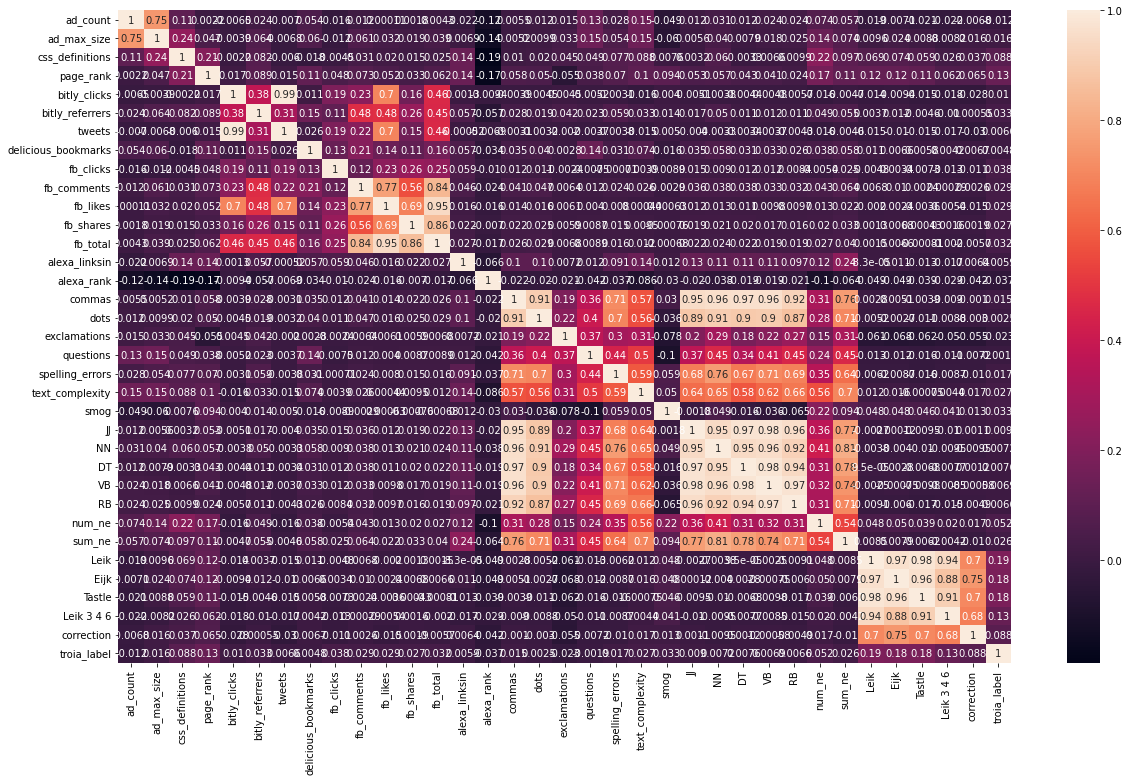

In [21]:
plt.figure(figsize=(20,12))
sns.heatmap(df_main.corr(),annot=True)
plt.show()

In [22]:
df_main.describe()

,ad_count,ad_max_size,css_definitions,page_rank,bitly_clicks,bitly_referrers,tweets,delicious_bookmarks,fb_clicks,fb_comments,fb_likes,fb_shares,fb_total,alexa_linksin,alexa_rank,commas,dots,exclamations,questions,spelling_errors,text_complexity,smog,JJ,NN,DT,VB,RB,num_ne,sum_ne,Leik,Eijk,Tastle,Leik 3 4 6,correction,troia_label
count,5642.000000,5642.000000,5662.000000,5687.000000,5684.000000,5684.000000,5687.000000,5662.000000,5680.000000,5680.000000,5680.000000,5680.000000,5462.000000,5.680000e+03,5.680000e+03,5687.000000,5691.000000,5687.000000,5687.000000,5687.000000,5687.000000,5450.000000,5419.000000,5439.000000,5407.000000,5423.000000,5235.000000,5108.000000,5108.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000,5691.000000
mean,2.643566,34488.191776,718.795655,2.390716,273.654469,3.216749,130.251627,1.008301,1.220070,67.273063,115.997535,92.654754,286.778836,2.798695e+04,1.864592e+06,41.102690,45.853804,1.716547,2.405662,57.767364,3.930929,13.882472,58.256136,362.196360,69.696689,108.442375,30.529513,4.706343,32.995301,0.755581,0.656389,0.782439,0.717170,-0.160956,3.294676
std,4.525768,50606.452621,1103.766556,2.067615,12153.556309,22.823327,7759.804697,10.724494,21.553199,1041.580994,2145.456839,1653.507501,4406.450512,1.864240e+05,4.215360e+06,138.767852,146.926136,8.771507,6.899116,154.338128,1.382503,5.208426,159.914509,963.464985,233.523205,323.019480,82.923343,2.950659,59.272067,0.213940,0.384105,0.200538,0.229198,0.367523,1.467086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.129100,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,1.000000
25%,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000e+01,3.930000e+03,8.000000,11.000000,0.000000,0.000000,9.000000,2.994558,11.208143,14.000000,89.000000,16.000000,25.000000,6.000000,2.000000,6.000000,0.642857,0.500000,0.657221,0.600000,0.000000,2.000000
50%,0.000000,0.000000,318.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.620000e+02,1.269820e+05,19.000000,23.000000,0.000000,0.000000,22.000000,3.743809,13.023867,30.000000,182.000000,34.000000,54.000000,14.000000,4.000000,16.000000,0.750000,0.750000,0.807355,0.688889,0.000000,3.000000
75%,4.000000,75000.000000,820.750000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,4.000000,10.000000,1.944000e+03,1.436036e+06,42.000000,46.000000,1.000000,2.000000,55.000000,4.583133,15.903189,61.000000,359.000000,70.000000,113.000000,32.000000,7.000000,39.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000
max,41.000000,307200.000000,8620.000000,9.000000,908270.000000,500.000000,584357.000000,533.000000,914.000000,59969.000000,109127.000000,108955.000000,178343.000000,2.201237e+06,3.081823e+07,6620.000000,5982.000000,465.000000,195.000000,5525.000000,21.263883,97.346125,7948.000000,44553.000000,12268.000000,15122.000000,3536.000000,16.000000,1345.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000


In [23]:
df_main.describe(include='O')

,category,document_url_y,resp_HNC,Controversial
count,5507,5691,5691,5691
unique,12,32,5,2
top,health,com,3,U
freq,1194,3778,2676,5556


In [24]:
df_main['category'].value_counts()

health                1194
business              1052
arts_entertainment     995
culture_politics       780
computer_internet      548
science_technology     450
recreation             113
religion               110
gaming                 106
unknown                 99
sports                  32
law_crime               28
Name: category, dtype: int64

In [25]:
df_main['document_url_y'].value_counts()

com                  3778
org                   855
gov                   209
edu                   189
net                   174
uk                    173
au                     68
ca                     61
in                     58
biz                    36
us                     14
nz                      9
int                     8
de                      7
ie                      7
fr                      6
it                      6
mil                     6
id                      6
info                    5
my                      2
coop                    2
org:443                 2
eu                      2
co                      1
com_?ref=goldpoll       1
asia:443                1
fm                      1
za                      1
asia                    1
ph                      1
tk                      1
Name: document_url_y, dtype: int64

In [26]:
df_main['resp_HNC'].value_counts()

3    2676
2    2020
C     713
1     280
0       2
Name: resp_HNC, dtype: int64

In [27]:
array = ['com', 'org', 'gov', 'edu','net','uk','au','ca','in']
df2 = df_main.loc[df_main['document_url_y'].isin(array)]
df2.shape

(5565, 39)

In [28]:
df2.describe(include='O')

,category,document_url_y,resp_HNC,Controversial
count,5382,5565,5565,5565
unique,12,9,5,2
top,health,com,3,U
freq,1165,3778,2628,5434


In [29]:
df2.isna().sum()/df2.shape[0]*100

ad_count                0.754717
ad_max_size             0.754717
css_definitions         0.503145
page_rank               0.071878
bitly_clicks            0.125786
bitly_referrers         0.125786
tweets                  0.071878
delicious_bookmarks     0.521114
fb_clicks               0.179695
fb_comments             0.179695
fb_likes                0.179695
fb_shares               0.179695
fb_total                4.097035
alexa_linksin           0.197664
alexa_rank              0.197664
commas                  0.071878
dots                    0.000000
exclamations            0.071878
questions               0.071878
spelling_errors         0.071878
text_complexity         0.071878
smog                    4.330638
category                3.288410
JJ                      4.851752
NN                      4.528302
DT                      5.031447
VB                      4.815813
RB                      8.068284
num_ne                 10.242588
sum_ne                 10.242588
document_u

In [30]:
## Dropping the missing values.
df2.dropna(inplace=True)

In [31]:
## dummy encode the categorical variable.
#df1 = pd.get_dummies(df2,drop_first=True)
#df1.shape

## Prepare Data

In [32]:
# Categorical features has to be converted into integer values for the model to process(one hot encoding).
y = df2["category"]
X = df2.drop("category",axis=1)

# select categorical features
cat_x = X.select_dtypes(include=['object']).columns

In [33]:
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_x)], remainder='passthrough')
X = ct.fit_transform(X)

In [85]:
# label encode the target variable
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
print(X.shape, y.shape, Counter(y))

(4646, 51) (4646,) Counter({5: 1009, 0: 903, 1: 831, 3: 706, 2: 432, 9: 391, 7: 98, 8: 95, 4: 86, 11: 46, 10: 26, 6: 23})


### Splitting the dataset

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
# performing preprocessing part
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA

In [54]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Covariance Matrix 
%s [[ 1.0003076  -0.01027051 -0.16175416 ... -0.063421   -0.06727969
   0.00778553]
 [-0.01027051  1.0003076  -0.13682328 ...  0.00508017  0.02262395
  -0.00535077]
 [-0.16175416 -0.13682328  1.0003076  ... -0.04157339 -0.01349266
  -0.07163624]
 ...
 [-0.063421    0.00508017 -0.04157339 ...  1.0003076   0.68629915
   0.12296175]
 [-0.06727969  0.02262395 -0.01349266 ...  0.68629915  1.0003076
   0.09754068]
 [ 0.00778553 -0.00535077 -0.07163624 ...  0.12296175  0.09754068
   1.0003076 ]]
Eigen Vectors 
%s [[ 8.38827161e-05 -3.70047724e-02  7.50848734e-03 ... -3.35383585e-03
   2.98795843e-03 -9.78741898e-04]
 [ 4.70841568e-03  1.00103517e-02  5.23294480e-03 ... -2.84662769e-03
   2.53608273e-03 -8.30724552e-04]
 [-5.34392070e-03 -3.80710665e-02 -3.78305718e-03 ... -1.43369823e-02
   1.27729290e-02 -4.18392726e-03]
 ...
 [-4.32869561e-04  3.83209527e-01 -3.04489151e-03 ... -6.49040939e-15
   1.95695706e-14 -6.46962050e-15]
 [-5.05426973e-03  3.54171848e-01 -1.1973096

In [55]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 17.61067025  28.27342336  37.14985872  42.21271914  46.72259581
  50.29852952  53.42898869  56.49867129  58.97565837  61.33053306
  63.63674701  65.82653521  67.92846773  70.01648369  72.06748963
  74.05569864  76.02518115  77.98489873  79.93756828  81.83970729
  83.65886468  85.42006123  87.03835236  88.54487227  89.96020508
  91.32155396  92.60411731  93.8076785   95.00321818  95.9444037
  96.63775415  97.262286    97.77390381  98.24006718  98.66447862
  99.04703925  99.33995494  99.51900826  99.68722181  99.76609032
  99.82667143  99.88468164  99.92452411  99.95309949  99.97478744
  99.99339291 100.         100.         100.         100.
 100.        ]


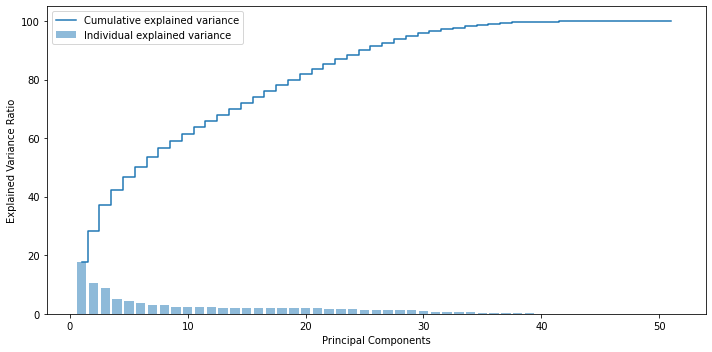

In [56]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [57]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 25,svd_solver='full')
 
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

### Random Forest model

In [58]:
rf =RandomForestClassifier()
rf_model = rf.fit(X_train,y_train)

In [59]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_test_pred))

precision = precision_score(y_test,y_test_pred, average='micro')
recall = recall_score(y_test,y_test_pred, average='micro')
accuracy = accuracy_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.505738880918221
Accuracy: 0.505738880918221
Recall: 0.505738880918221
Precision: 0.505738880918221
F1-score: 0.2660633731477393


In [60]:
rf =RandomForestClassifier()
rf_model = rf.fit(X_train_pc,y_train)

rf_predict_train = rf_model.predict(X_train_pc)
rf_predict_test = rf_model.predict(X_test_pc)

precision = precision_score(y_test,rf_predict_test, average='micro')
recall = recall_score(y_test,rf_predict_test, average='micro')
accuracy = accuracy_score(y_test,rf_predict_test)
f1 = f1_score(y_test,rf_predict_test, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")  
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.40387374461979914
Recall: 0.40387374461979914
Precision: 0.40387374461979914
F1-score: 0.20394678340322128


### KNN classifier

In [61]:
neighbors=range(1,8)
for n in neighbors:
    clf_knn = KNeighborsClassifier(n_neighbors=n, metric = "euclidean")
    print(clf_knn.fit(X_train, y_train))
    y_pred = clf_knn.predict(X_test)
    precision = precision_score(y_test,y_pred, average='micro')
    recall = recall_score(y_test,y_pred, average='micro')
    accuracy = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred, average='macro')
    print("Prediction for Neighbor:",n)
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")  
    print(f"Precision: {precision}")
    print(f"F1-score: {f1}")

KNeighborsClassifier(metric='euclidean', n_neighbors=1)
Prediction for Neighbor: 1
Accuracy: 0.3285509325681492
Recall: 0.3285509325681492
Precision: 0.3285509325681492
F1-score: 0.18040684499028192
KNeighborsClassifier(metric='euclidean', n_neighbors=2)
Prediction for Neighbor: 2
Accuracy: 0.3235294117647059
Recall: 0.3235294117647059
Precision: 0.3235294117647059
F1-score: 0.161231024187875
KNeighborsClassifier(metric='euclidean', n_neighbors=3)
Prediction for Neighbor: 3
Accuracy: 0.3285509325681492
Recall: 0.3285509325681492
Precision: 0.3285509325681492
F1-score: 0.15893341061690844
KNeighborsClassifier(metric='euclidean', n_neighbors=4)
Prediction for Neighbor: 4
Accuracy: 0.32711621233859395
Recall: 0.32711621233859395
Precision: 0.32711621233859395
F1-score: 0.1575253361233034
KNeighborsClassifier(metric='euclidean')
Prediction for Neighbor: 5
Accuracy: 0.3428981348637016
Recall: 0.3428981348637016
Precision: 0.3428981348637016
F1-score: 0.16420047572692556
KNeighborsClassifier

### DecisionTreeClassifier

In [62]:
DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = DT.predict(X_test)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.3672883787661406
Recall: 0.3672883787661406
Precision: 0.3672883787661406
F1-score: 0.20512760739369096


### Naive bayes Classifier

In [64]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred = nb_model.predict(X_test)

#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.04878048780487805
Recall: 0.04878048780487805
Precision: 0.04878048780487805
F1-score: 0.049920633019835896


In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

# Don't have to set `multi_class` argument if used with OVOClassifier
ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

ovo.fit(X_train, y_train)
OneVsOneClassifier(estimator=GaussianProcessClassifier())

OneVsOneClassifier(estimator=GaussianProcessClassifier())

In [66]:
y_pred = ovo.predict(X_test)

#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.37087517934002867
Recall: 0.37087517934002867
Precision: 0.37087517934002867
F1-score: 0.19872644783879248


In [50]:
y_pred

array([1, 0, 5, ..., 0, 0, 1])

In [67]:
import pickle

In [86]:
with open("../models/labelencoder.pkl",'wb') as file:
    pickle.dump(le,file)
file.close()

In [87]:
le

LabelEncoder()

In [88]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [89]:
l=pickle.load(open("../models/labelencoder.pkl","rb"))

In [91]:
l.inverse_transform([1,2])

array([1, 2])